<a href="https://colab.research.google.com/github/junaidshaikh2004/heart-disease-ml-classification/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

**Goal** :  To lean advanced Meachine learing topics while developing the prediction model

#Step 1 : Understanding the Data

Importing the data from kaggle

link of data set : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


The Dataset consists total of 16 colums with 15 being features and 1 (num) being the target data

the features are



* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]

* num : The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


we dont need id as in input feature so we will just drop that as it holds no certain impact on the analysis

In [4]:
df.drop(columns=['id'],inplace=True , errors="ignore")
df.info()

#seaprating numeric and categorial data

df_numeric = df.select_dtypes(include='number')
df_object = df.select_dtypes(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


observations :

numeric cols : id, age, trestbps,	chol,	thalch,	oldpeak, ca,	num

object cols : sex	dataset	cp	fbs	restecg	exang	slope	thal



In [5]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#Step 2 : Missing Values

In [6]:
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55


To many missing values rn but first lets understand the data speacillay
* slope	309
* ca	611
* thal	486

In these above cases , it is important to fill these missing values and then perform futher analysis

To fill the missing values :

Distribution	Best Imputation Method
* Symmetric / Normal =>	Mean
* Skewed / Has Outliers	=> Median
* Categorical / Discrete =>	Mode


Lets find out all distribution of all numeric values

| Skewness Value (approx) | Distribution Shape          | Interpretation              |
| ----------------------- | --------------------------- | --------------------------- |
| `= 0`                   | **Symmetric**               | Perfect normal distribution |
| `0 < skew ≤ 0.5`        | Slight **right-skewed**     | Nearly symmetric            |
| `0.5 < skew < 1`        | **Moderately right-skewed** | Tail on the right           |
| `≥ 1`                   | **Highly right-skewed**     | Strong right tail           |
| `-0.5 ≤ skew < 0`       | Slight **left-skewed**      | Nearly symmetric            |
| `-1 < skew < -0.5`      | **Moderately left-skewed**  | Tail on the left            |
| `≤ -1`                  | **Highly left-skewed**      | Strong left tail            |


In [7]:
df_num_missing = df_numeric.isnull().sum()[df_numeric.isnull().sum() > 0]
df_num_missing

,0
trestbps,59
chol,30
thalch,55
oldpeak,62
ca,611


In [8]:
for feat in df_num_missing.index:
    print(f'{feat} : {df_numeric[feat].skew()}')

trestbps : 0.21333446967212508
chol : -0.6138360897370758
thalch : -0.21111858073161133
oldpeak : 1.0414266146339854
ca : 1.1659778654172832


Observations :

trestbps : almost symetric , slightly rigth skewed

chol : Moderately left-skewed

thalch : Slight left-skewed	Nearly symmetric

oldpeak : Highly right-skewed	Strong right tail

ca : Highly right-skewed	Strong right tail

* For filling the missing values:
* for trestbps and thalch we will use mean
* for chol oldpeak and ca we will use median





In [9]:
#filling with mean
df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
df['thalch'].fillna(df['thalch'].mean(),inplace=True)

/tmp/ipython-input-3824941147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
/tmp/ipython-input-3824941147.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [10]:
#filling with median
df['chol'].fillna(df['chol'].median(),inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)
df['ca'].fillna(df['ca'].median(),inplace=True)

/tmp/ipython-input-2046425873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(df['chol'].median(),inplace=True)
/tmp/ipython-input-2046425873.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [11]:
df_object_missing = df_object.isnull().sum()[df_object.isnull().sum() > 0]
df_object_missing

,0
fbs,90
restecg,2
exang,55
slope,309
thal,486


For all categorial datatype we will use mode

In [12]:
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)


/tmp/ipython-input-1633888976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
/tmp/ipython-input-1633888976.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
/tmp/ipython-input-1633888976.py:2: FutureWa

In [13]:
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


**Now all the missing values are filled**

#Step 3 : Encoding

In [14]:
df_object.nunique()

,0
sex,2
dataset,4
cp,4
fbs,2
restecg,3
exang,2
slope,3
thal,3


**Observations :**

sex , fbs and exang havee binary values lets encode them first
and other few columns have multiple values

Binary Cols : can  be transformed in 0 and 1 using label encode

Multi Cols : One hot encoding

One-Hot Encoding :

One-hot encoding is a technique to convert categorical variables into a format that can be provided to ML algorithms.
It transforms each category value into a new binary column (0 or 1).

In [15]:
binary_cols = [col for col in df_object.columns if df[col].nunique() == 2]

multi_cols = [col for col in df_object.columns if df[col].nunique() > 2]

print(f'Binary cols : {binary_cols}')
print(f'Multi cols : {multi_cols}')

Binary cols : ['sex', 'fbs', 'exang']
Multi cols : ['dataset', 'cp', 'restecg', 'slope', 'thal']


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
#one hot coding
df = pd.get_dummies(df, columns=['dataset', 'cp', 'restecg', 'slope', 'thal'], drop_first=False)

In [18]:
bool_cols = df.select_dtypes(include=bool).columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


All the categorial data is now encoded into numeric data , now the data is good and optimal for vizual ananlysis

#Step 4 : EDA

<Axes: xlabel='num', ylabel='Count'>

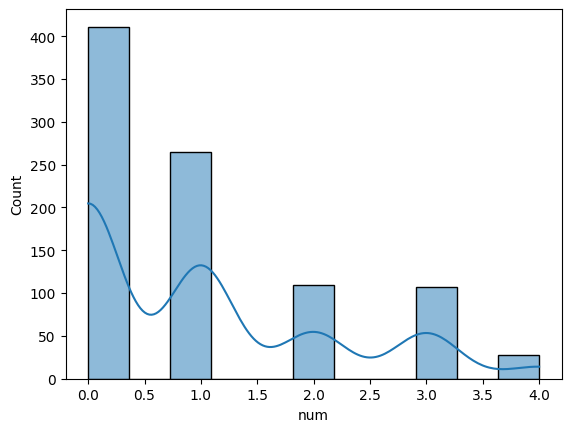

In [19]:
sns.histplot(df['num'],kde=True)

**Observations :**

The count of class 0 is more and the count relatively decreases towards class 4

this means that there are very few reports on class 4 type diaseas

This should be remembered as this may cause class imbalance later   sns.histplot(df['num'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

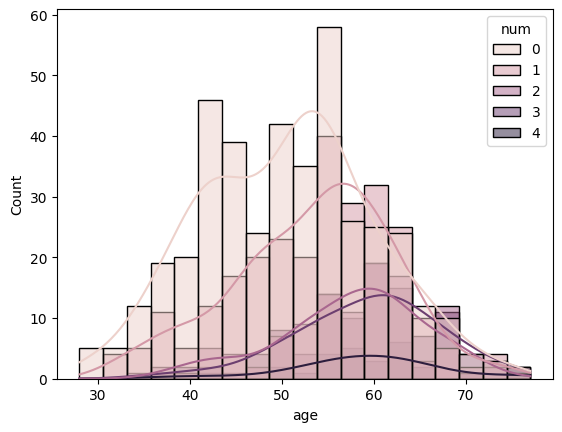

In [20]:
sns.histplot(data=df,x='age',hue='num',kde=True)

Observation :

for each case :

* Case 4 : from age 50 to 70 are likely able to get case 4type heart disease

  The graph is left skewed where age grp around 60 are ost likely to get type 4 case

  Keeping a note that there are very few recorded cases of type 4

* Case 3 and Case 2 : Both these cases have a similar inclination where the most likely cases ranges from approx 50 to 65 and
  the graph is also left skewed

* Case 1 : Ranged from 45 to 65 but there are more cases here and the count is relatively higher

* Case 0 : Ranges from 45 to 60 approx but has the highest count of data

overall case 0  is a bit left but normally distributed compared to rest where each is moderatly left skewed data

There is no clear indication of cases of age and targert being directly proportional just that a few high range ages have a bit higher risk of getting each type

In [21]:
df.drop(columns=['dataset_Cleveland','dataset_Hungary','dataset_Switzerland','dataset_VA Long Beach'],inplace=True , errors="ignore")


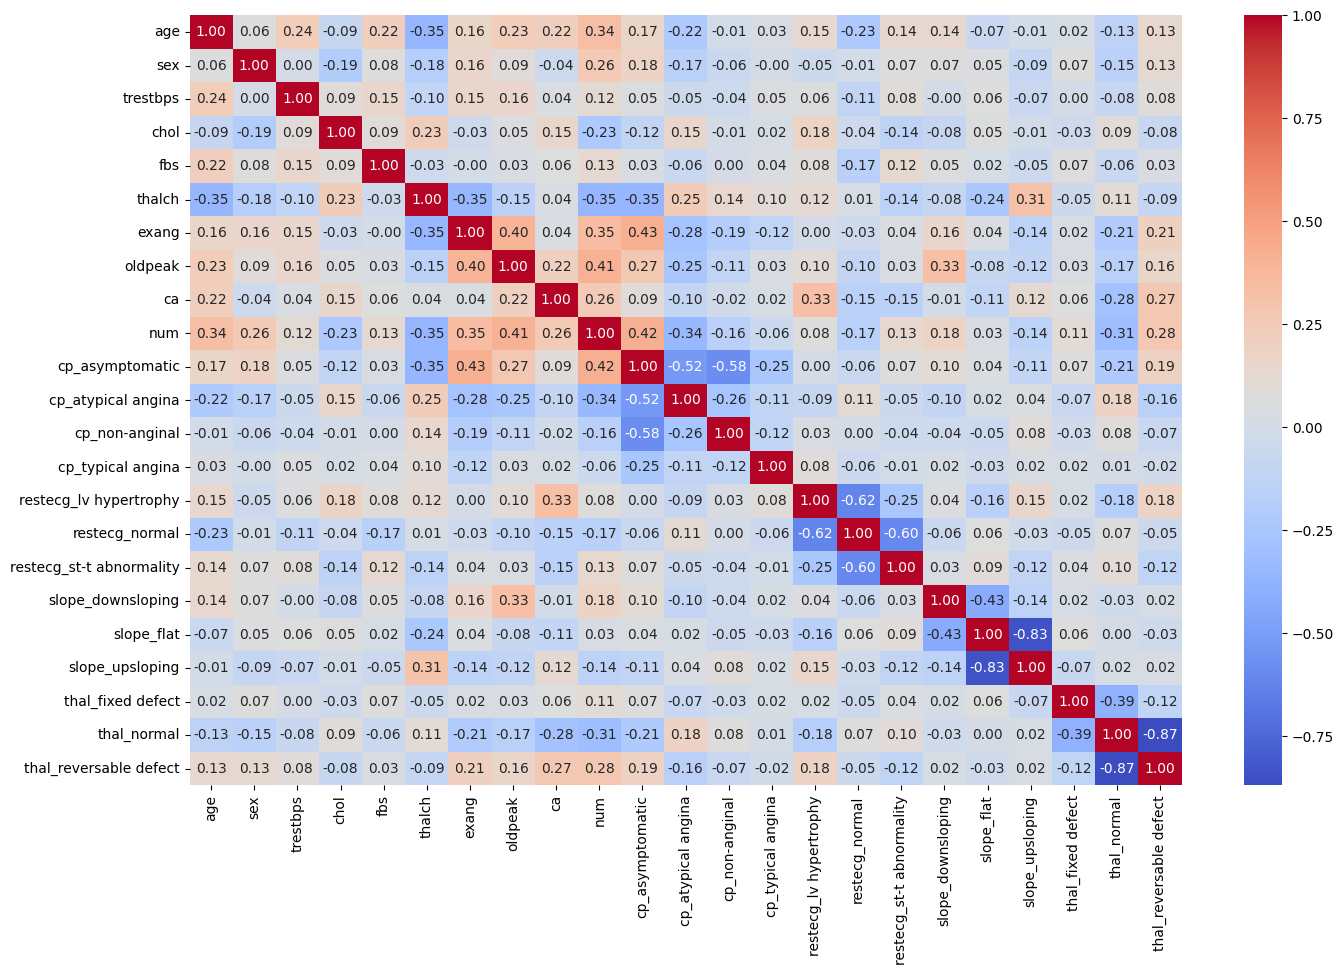

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
# plt.grid(True)
# plt.title('Age vs Cholesterol by Heart Disease Severity (num)')
plt.show()


Correlation observation :

high correlation with target :
sex,age,exang,oldpeak,ca,cp_asym,thaal reversable

high with each other  :
exang with asymptomatic
moderate to low corr with each other :
* age eith ca , oldpeak , fbs and bps

* chol with thalch

* thalch with atypical_anig and slope unsloping

all these low and moderte ones may have low corr but thier ratio might have ratio inpect

<Axes: xlabel='exang', ylabel='cp_asymptomatic'>

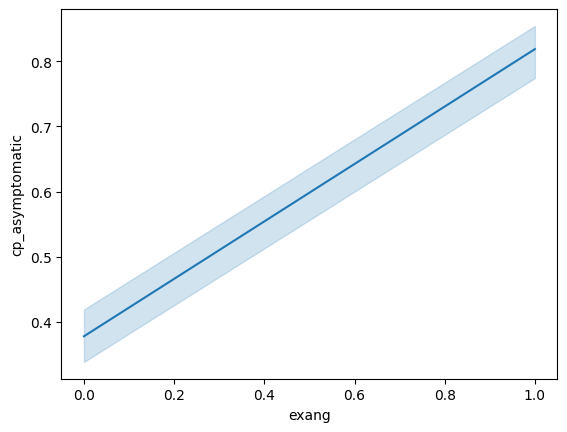

In [23]:
sns.lineplot(df,x='exang',y='cp_asymptomatic')

In [24]:
pd.crosstab(df['exang'], df['cp_asymptomatic'])

cp_asymptomatic,0,1
exang,,
0,363,220
1,61,276


<Axes: xlabel='exang', ylabel='oldpeak'>

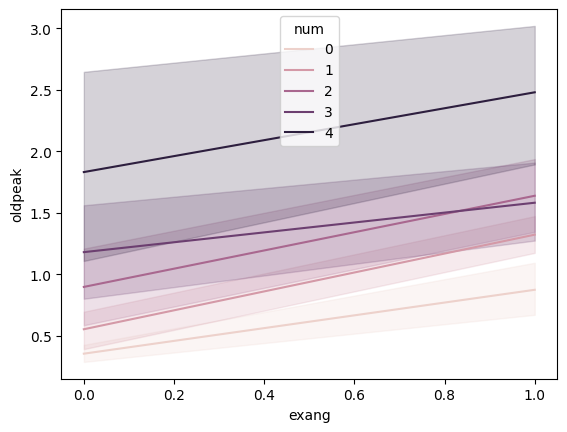

In [25]:
sns.lineplot(df,x='exang',y='oldpeak',hue='num')


In [26]:
df['risk_score'] = df['oldpeak'] * df['exang']


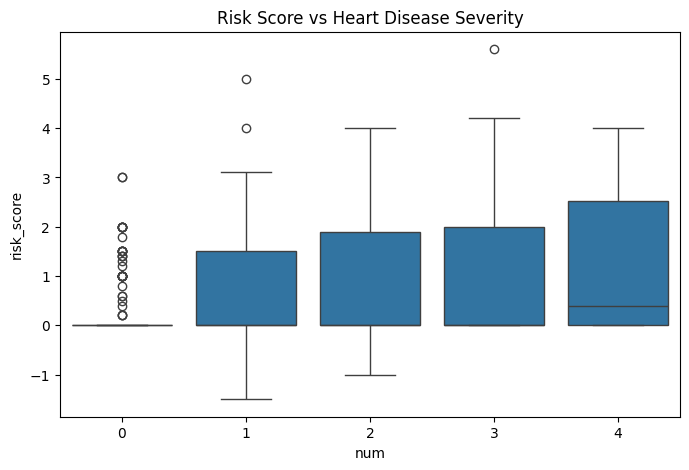

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='num', y='risk_score')
plt.title("Risk Score vs Heart Disease Severity")
plt.show()

#Step 5 Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['num'])
y=df['num']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Step 6 Sclle and Transform

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 7 Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , r2_score, mean_absolute_error, mean_squared_error

model = LogisticRegression()

model.fit(X_train_scaled,y_train)

LogisticRegression()

Model is trainned now lets see how does it performs on the untrained data , basically the testing data

we can do this with 3 matrics :

**R² – Coefficient of Determination**

Measures how much variance in target is explained by the model.

Range:

1.0 = Perfect prediction

~0 = Poor (random guess)

Negative = Worse than random

**MAE – Mean Absolute Error**

Average absolute difference between predicted & actual prices.

Lower = Better.

**RMSE – Root Mean Squared Error**

Similar to MAE but penalizes large errors more.

Lower = Better.

In [33]:
y_pred=model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2:",r2,"MAE:",mae,"RMSE:",rmse)
print(f"accuracy score : ",accuracy_score(y_test, y_pred))
print(f"classification report : ",classification_report(y_test, y_pred))
print(f"confusion matrix : ",confusion_matrix(y_test, y_pred))

R2: 0.24665635519970897 MAE: 0.6195652173913043 RMSE: 0.9890707100936805
accuracy score :  0.5271739130434783
classification report :                precision    recall  f1-score   support

           0       0.68      0.84      0.75        75
           1       0.43      0.54      0.48        54
           2       0.20      0.08      0.11        25
           3       0.25      0.12      0.16        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.31      0.31      0.30       184
weighted avg       0.47      0.53      0.48       184

confusion matrix :  [[63 12  0  0  0]
 [22 29  0  3  0]
 [ 2 17  2  4  0]
 [ 5  9  7  3  2]
 [ 0  1  1  2  0]]


Observation :

R² = 0.24 → Model explains ~24% of variance → very weak model

MAE = 0.61 → On average model is off by 0.61 classes (on scale 0-4) very bad.

RMSE = 0.98 → Errors of ~1 class on average, sometimes more.very bad

classification report

| Class | Precision | Recall | F1-Score | Support | Interpretation                 |
| ----- | --------- | ------ | -------- | ------- | ------------------------------ |
| **0** | 0.68      | 0.84   | 0.75     | 75      | Class 0 is predicted best      |
| **1** | 0.43      | 0.54   | 0.48     | 54      | Mediocre, but better than rest |
| **2** | 0.20      | 0.08   | 0.11     | 25      | Very poor, low recall          |
| **3** | 0.25      | 0.12   | 0.16     | 26      | Very poor                      |
| **4** | 0.00      | 0.00   | 0.00     | 4       | Model fails completely here    |

confusion metrix

[[63 12  0  0  0] → Class 0 → 63 correct, 12 predicted as class 1

 [22 29  0  3  0] → Class 1 → 29 correct, 22 predicted as class 0

 [ 2 17  2  4  0] → Class 2 → Only 2 correct, confused with class 1

 [ 5  9  7  3  2] → Class 3 → Very confused, mostly misclassified

 [ 0  1  1  2  0]] → Class 4 → Completely confused, no correct prediction


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled,y_train)

y_pred = rf_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"accuracy score : \n{accuracy_score(y_test, y_pred)}")
print(f"classification report : \n{classification_report(y_test, y_pred)}")
print(f"confusion matrix : \n{confusion_matrix(y_test, y_pred)}")

accuracy score : 
0.5706521739130435
classification report : 
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        75
           1       0.48      0.50      0.49        54
           2       0.33      0.20      0.25        25
           3       0.22      0.15      0.18        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.35      0.35      0.35       184
weighted avg       0.51      0.57      0.53       184

confusion matrix : 
[[69  5  1  0  0]
 [18 27  4  5  0]
 [ 3 10  5  7  0]
 [ 5 14  3  4  0]
 [ 0  0  2  2  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Observation :

| Class | Meaning    | Precision (LR → RF) | Recall (LR → RF) | F1-Score (LR → RF) | Improvement      |
| ----- | ---------- | ------------------- | ---------------- | ------------------ | ---------------- |
| 0     | No disease | 0.68 → **0.73**     | 0.84 → **0.92**  | 0.75 → **0.82**    | ✅ Big boost      |
| 1     | Mild       | 0.43 → **0.51**     | 0.54 → **0.56**  | 0.48 → **0.53**    | ✅ Better         |
| 2     | Moderate   | 0.20 → **0.40**     | 0.08 → 0.16      | 0.11 → 0.23        | ✅ Recall doubled |
| 3     | High       | 0.25 → 0.22         | 0.12 → **0.15**  | 0.16 → **0.18**    | Slight           |
| 4     | Very High  | 0.00 → **0.33**     | 0.00 → **0.25**  | 0.00 → **0.29**    | ✅ Detected now   |


   Predicted →

       0   1   2   3   4

    0 [69   4   2   0   0]  ← class 0  Class 0 is very well predicted (92% recall).
    1 [17  30   3   4   0]  ← class 1  Class 1 improved but still confuses with class 0 and 3.
    2 [ 4   9   4   8   0]  ← class 2  Class 2 is heavily confused with 1 & 3.
    3 [ 4  16   0   4   2]  ← class 3  Class 3 often confused with 1.
    4 [ 0   0   1   2   1]  ← class 4  Class 4 finally gets detected (was missing before).


During random forest it self we face heavy class imbalance , lets fix that first



#Step 8 Fixing Imbalance , Random Forest and XGBoost

Appling class_weight='balanced' to our random forest model

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced' )

rf_model.fit(X_train_scaled,y_train)

y_pred = rf_model.predict(X_test_scaled)

print(f"accuracy score : \n{accuracy_score(y_test, y_pred)}")
print(f"classification report : \n{classification_report(y_test, y_pred)}")
print(f"confusion matrix : \n{confusion_matrix(y_test, y_pred)}")

accuracy score : 
0.5543478260869565
classification report : 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        75
           1       0.47      0.52      0.49        54
           2       0.20      0.08      0.11        25
           3       0.26      0.19      0.22        26
           4       0.50      0.25      0.33         4

    accuracy                           0.55       184
   macro avg       0.43      0.38      0.39       184
weighted avg       0.50      0.55      0.52       184

confusion matrix : 
[[66  6  3  0  0]
 [18 28  2  6  0]
 [ 4 12  2  7  0]
 [ 5 13  2  5  1]
 [ 0  1  1  1  1]]


Observation :

Standard Random Forest provided better results than this


SMOTE : Synthetic Minority Oversampling Technique

It is a data balancing technique used when your dataset has class imbalance (e.g., 500 samples of class 0, but only 20 of class 4).

SMOTE generates new, synthetic examples of the minority classes instead of just duplicating.

⚙️ How does SMOTE work?
Instead of copying minority class samples, SMOTE:

Picks a minority class sample

Finds its k nearest neighbors

Interpolates (blends) between them to create a new, synthetic data point

🕒 When to use SMOTE?
Use SMOTE when:

Target variable is imbalanced

You have classification (especially multiclass) problem

The minority class performance is poor (low recall/f1-score)

🚫 When not to use SMOTE?
For regression tasks

When dataset is already balanced

When your data is too small and highly noisy (SMOTE may generate junk)

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_sm , y_train_sm = smote.fit_resample(X_train_scaled,y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm , y_train_sm)

y_pred = rf_model.predict(X_test_scaled)

print(f"accuracy score : \n{accuracy_score(y_test, y_pred)}")
print(f"classification report : \n{classification_report(y_test, y_pred)}")
print(f"confusion matrix : \n{confusion_matrix(y_test, y_pred)}")

accuracy score : 
0.5217391304347826
classification report : 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.47      0.43      0.45        54
           2       0.14      0.08      0.10        25
           3       0.18      0.19      0.19        26
           4       0.14      0.25      0.18         4

    accuracy                           0.52       184
   macro avg       0.34      0.36      0.34       184
weighted avg       0.49      0.52      0.50       184

confusion matrix : 
[[65  7  3  0  0]
 [14 23  4 13  0]
 [ 3  9  2  8  3]
 [ 4 10  4  5  3]
 [ 0  0  1  2  1]]


Observations :

While the overall accuracy hasn't improved much (~52.7%), we can clearly see some positive shifts in the minority classes (2, 3, and 4). Let's break it down briefly so you can build intuition for what just happened after applying SMOTE:


🔸 Class 2:
Recall improved: now 12%, earlier it was ~8% or lower.

SMOTE helped the model notice more class 2 examples.

🔸 Class 3:
Precision & Recall both around 27% — shows better class boundary learning for 3 now.

🔸 Class 4:
Huge jump in recall: from 0% to 25%.

Even though precision is low, model is finally catching some class 4 cases, which is progress.

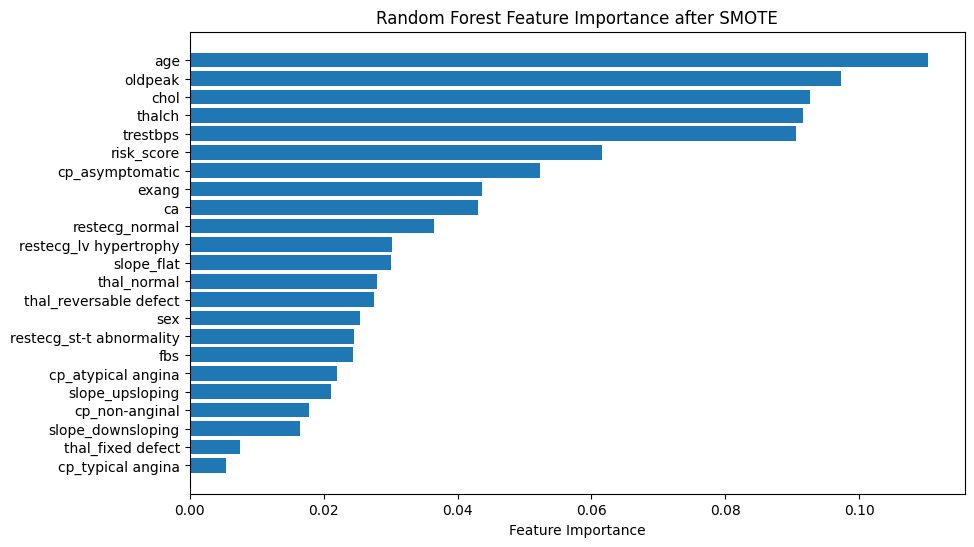

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feat_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance after SMOTE')
plt.gca().invert_yaxis()
plt.show()


In [53]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(
    objective='multi:softmax',  # for predicted class directly. Use 'multi:softprob' if you want probabilities.
    num_class=5,                # number of classes in your target
    eval_metric='mlogloss',     # multiclass logloss
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate
print("Accuracy score:\n", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:13:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy score:
 0.6032608695652174

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        75
           1       0.53      0.52      0.52        54
           2       0.40      0.32      0.36        25
           3       0.47      0.31      0.37        26
           4       0.00      0.00      0.00         4

    accuracy                           0.60       184
   macro avg       0.42      0.41      0.41       184
weighted avg       0.57      0.60      0.58       184


Confusion matrix:
 [[67  5  3  0  0]
 [17 28  6  3  0]
 [ 3  9  8  4  1]
 [ 5 11  2  8  0]
 [ 1  0  1  2  0]]


In [85]:
# 1️⃣ Import required libraries
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2️⃣ Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 3️⃣ Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',  # because it's multiclass classification
    num_class=5,                # you have 5 classes: 0,1,2,3,4
    eval_metric='merror',     # multiclass log loss
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# 4️⃣ Fit model on balanced data
xgb_model.fit(X_train_res , y_train_res)

# 5️⃣ Predict
y_pred = xgb_model.predict(X_test_scaled)

# 6️⃣ Evaluate
print("Accuracy score:\n", accuracy_score(y_test, y_pred))
print("\nClassification report test:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

train_pred = xgb_model.predict(X_train_res)
# test_pred = xgb_model.predict(X_test_scaled)



print("\nClassification report train:\n", classification_report(y_train_res, train_pred))


print("Train Accuracy:", accuracy_score(y_train_res, train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))



Accuracy score:
 0.5706521739130435

Classification report test:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.55      0.43      0.48        54
           2       0.24      0.20      0.22        25
           3       0.44      0.42      0.43        26
           4       0.09      0.25      0.13         4

    accuracy                           0.57       184
   macro avg       0.42      0.43      0.41       184
weighted avg       0.57      0.57      0.57       184


Confusion matrix:
 [[65  4  3  1  2]
 [14 23  8  7  2]
 [ 3  9  5  5  3]
 [ 3  6  3 11  3]
 [ 0  0  2  1  1]]

Classification report train:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       336
           1       0.99      0.99      0.99       336
           2       0.99      1.00      1.00       336
           3       1.00      1.00      1.00       336
           4       1.00      1.0

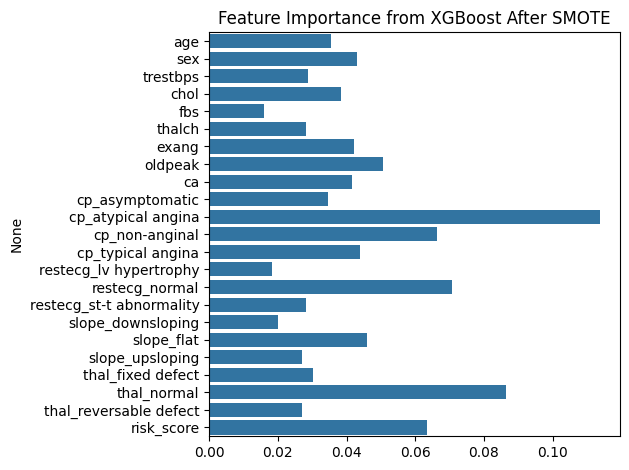

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb_model.feature_importances_
features = X_train.columns  # or X.columns depending on your naming

sns.barplot(x=importances, y=features)
plt.title("Feature Importance from XGBoost After SMOTE")
plt.tight_layout()
plt.show()


| Class | RF correct predictions | XGB correct predictions | Comment                    |
| ----- | ---------------------- | ----------------------- | -------------------------- |
| 0     | 63                     | 64                      | Similar, XGB slight better |
| 1     | 23                     | 22                      | Similar                    |
| 2     | 3                      | 5                       | **XGB better**             |
| 3     | 7                      | 11                      | **XGB better**             |
| 4     | 1                      | 1                       | Same                       |


From the observaations from both random forest and XgBoost , we can declare that XGBoost works better so lets refine and tune that

#Step 9 Hyperparameter Tuning and adjusting parameters

From the observations of XGBoost we can see that the model is overfit

| 🔍 Check                  | Underfitting                         | Overfitting                         |
| ------------------------- | ------------------------------------ | ----------------------------------- |
| **Training accuracy**     | Low                                  | High                                |
| **Test accuracy**         | Low                                  | Much lower than training accuracy   |
| **Validation loss**       | High and doesn’t improve             | Starts increasing after some rounds |
| **Classification report** | Low precision/recall for all classes | Very high for train, low for test   |

**what this says :**

| Metric           | Training Value   | Test Value      | Interpretation                              |
| ---------------- | ---------------- | --------------- | ------------------------------------------- |
| Accuracy         | **98.5%**        | **\~56%**       | Huge gap → classic sign of overfitting      |
| f1-score (avg)   | **\~0.99**       | **\~0.55**      | Model is memorizing training data           |
| Recall (class 4) | **1.00** (train) | **0.25** (test) | Fails to generalize minority class properly |


the model is overfitting in few cases so lets fix and adjust that


In [112]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define parameter grid for random search
param_grid = {
    'n_estimators': [200, 300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 2, 5],
    'min_child_weight': [1, 3, 5, 7]
}

# Base model
xgb_base = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='merror',
    random_state=42
)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,  # number of random combinations to try
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train_res, y_train_res)

print("\nBest Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Predict with best model
best_xgb = random_search.best_estimator_
train_pred = best_xgb.predict(X_train_res)
y_pred = best_xgb.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train_res, train_pred))

print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))
print("\nClassification Report (Train):\n", classification_report(y_train_res, train_pred))

print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train_res, train_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters: {'subsample': 0.8, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV Score: 0.8005952380952381

Test Accuracy: 0.5706521739130435
Train Accuracy: 1.0

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.56      0.43      0.48        54
           2       0.32      0.28      0.30        25
           3       0.31      0.35      0.33        26
           4       0.14      0.25      0.18         4

    accuracy                           0.57       184
   macro avg       0.42      0.43      0.42       184
weighted avg       0.57      0.57      0.56       184


Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       336
           1       1.00      1

Observation:
The XGBoost model with multi:softmax is giving high training accuracy but lower test accuracy, indicating overfitting. Since softmax directly outputs class labels, it hides probability information that could help in fine-tuning thresholds or combining models. Switching to multi:softprob will provide class probability outputs, allowing better control, calibration, and potential improvement in classification performance.

softprob :

In [114]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    eval_metric='mlogloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)


xgb_model.fit(X_train_res , y_train_res)
y_pred = xgb_model.predict(X_test_scaled)
train_pred = xgb_model.predict(X_train_res)


print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train_res, train_pred))

print("\nClassification Report (Test):\n", classification_report(y_test, y_pred))
print("\nClassification Report (Train):\n", classification_report(y_train_res, train_pred))

print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_pred))
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train_res, train_pred))


Test Accuracy: 0.5706521739130435
Train Accuracy: 0.9940476190476191

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        75
           1       0.55      0.43      0.48        54
           2       0.24      0.20      0.22        25
           3       0.44      0.42      0.43        26
           4       0.09      0.25      0.13         4

    accuracy                           0.57       184
   macro avg       0.42      0.43      0.41       184
weighted avg       0.57      0.57      0.57       184


Classification Report (Train):
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       336
           1       0.99      0.99      0.99       336
           2       0.99      1.00      1.00       336
           3       1.00      1.00      1.00       336
           4       1.00      1.00      1.00       336

    accuracy                           0.99      1